In [2]:
from sort_functions import quick_sort

import pprint
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [3]:
def inter_search(A, key):
    left = 0 ; right = len(A) - 1
    
    while left <=right and  A[left] <= key <= A[right] :
        mid = left + ((key-A[left]) * (right-left))\
                        // (A[right]-A[left])     

        if A[mid] == key: return mid
        elif A[mid] < key: left = mid + 1
        elif A[mid] > key: right = mid - 1
    return None

In [4]:
def binary_search (A, key): 
    left = 0; right = len(A) - 1
    
    while left <= right:
        mid = (left + right) // 2

        if A[mid] == key:
            return mid
        elif A[mid] > key:
            right = mid - 1
        elif A[mid] < key:
            left = mid + 1
        else: return None

In [41]:
def analys_searc(min_len = 5, max_len = 50, n_mas = 50, times = 20, save = False):
    result = []  # [ len, inter, bin]
    
    for length in range(min_len, max_len+1):
        data = np.random.randint(0, 10000, (n_mas, length))
        [quick_sort(data[i]) for i in range(data.shape[0])]
        
        bin_time = []; inter_time = []
        
        for _ in range(times):
            random_key = random.randint(0, length-1)  
            
            for j in range(data.shape[0]):
                time_now = time.time()
                inter_search(data[j], data[j][random_key])
                inter_time.append(time.time() - time_now)
                
                time_now = time.time()
                binary_search(data[j], data[j][random_key])
                bin_time.append(time.time() - time_now)
        result.append([length, np.array(inter_time).mean(), np.array(bin_time).mean()])
    result = np.array(result)
    
    if save : np.save('result.npy', result)
    
    return result
        

In [42]:
res = analys_searc(max_len=100)

In [8]:
res = np.load('result.npy')

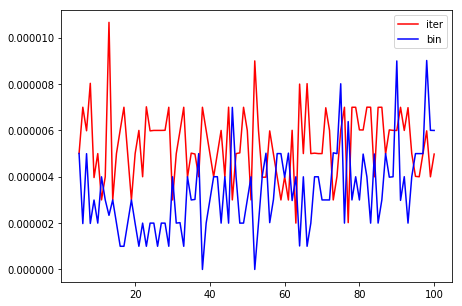

In [66]:
fig, ax = plt.subplots(figsize=(7, 5))


ax.plot(res[:,0], res[:,1], c = 'r')
ax.plot(res[:,0], res[:,2], c = 'b')
ax.legend(['iter', 'bin'])
plt.show()

In [58]:
# inter - bin ////// to recive points the bin search works faster
difference = res[:, 1] - res[:, 2]
difference_mask = [key < 0 for key in difference]

In [56]:
best_rows = res[difference_mask]
best_indexis = np.array(best_rows[:, 0], dtype=np.int32)

In [57]:
best_indexis

array([ 11,  14,  19,  30,  34,  37,  44,  46,  51,  54,  55,  58,  59,
        61,  63,  73,  74,  75,  77,  84,  87,  90,  95,  96,  98,  99,
       100])

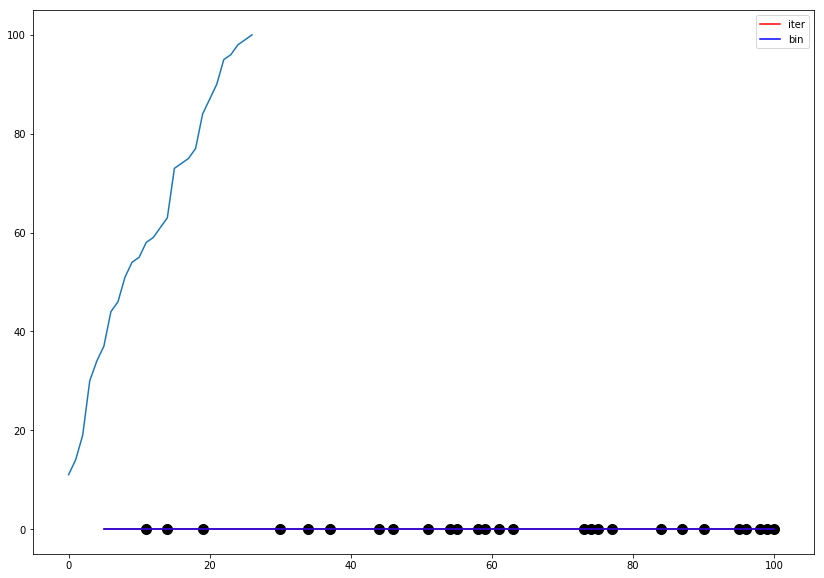

In [85]:
fig, ax = plt.subplots(figsize=(14, 10))


ax.plot(res[:,0], res[:,1], c = 'r')
ax.plot(res[:,0], res[:,2], c = 'b')

ax.scatter(best_indexis, res[difference_mask, 2] , c='#000000', s = 1e2)

ax.plot(best_indexis)

ax.legend(['iter', 'bin'])
plt.show()

In [62]:
res.shape

(96, 3)